In [1]:
import pandas as pd
import xarray as xr
import requests

In [2]:
#Generates link to csv download of wind report on given date. Date format "yymmdd"
def generate_link(date):
    return f'https://www.spc.noaa.gov/climo/reports/{date}_rpts_wind.csv'

In [3]:
#Gets wind report on given date as a pandas dataframe
def get_wind_report(date):
    df = request_wind_report_df(date)    
    df = add_datetime(df, date)
    return df

def request_wind_report_df(date):
    #Actual request
    link = generate_link(date)
    data = requests.get(link)
    #Turns csv string into dataFrame
    csv_string = data.text
    data = [row.split(',') for row in csv_string.split('\n')]
    data.pop(-1)
    columns = data.pop(0)
    data.pop(0)
    #Returns dataframe 
    df = pd.DataFrame(data, columns=columns)
    return df

def add_datetime(df, date):
    #Hardcoded
    day = date[4] + date[5]
    time = df["Time"]
    datetime = f'2023-05-{day}'
    #Adds date time with correct string format
    df["datetime"] = [pd.Timestamp(f'{datetime} {t}') for t in time]
    df['datetime'] = pd.to_datetime(df["datetime"])
    #Removes Time column
    df.drop(columns=["Time"], inplace=True)
    return df 

In [4]:
get_wind_report("230531")

,Speed,Location,County,State,Lat,Lon,Comments,datetime
0,60,Tunerville,Deuel,SD,44.89,-96.68,Mesonet station 291 4N Altamont (SDDOT). (ABR),2023-05-31 18:51:00
1,UNK,1 N Yorkville,Kendall,IL,41.65,-88.45,Pictures of large tree limbs downed at multipl...,2023-05-31 20:07:00
2,60,3 SW Dalhart,Hartley,TX,36.02,-102.55,(AMA),2023-05-31 20:16:00
3,61,8.9 WNW St. Charles,Kane,IL,41.96,-88.47,Also approx 0.5 inch hail. (LOT),2023-05-31 20:45:00
4,77,11 NNW Slash Ranch,Loving,TX,31.98,-103.67,Mesonet station FW9691 Mentone. (MAF),2023-05-31 21:00:00
5,60,3 SE Dumas,Moore,TX,35.83,-101.92,(AMA),2023-05-31 21:16:00
6,59,9 NNE Sunray,Sherman,TX,36.14,-101.78,(AMA),2023-05-31 21:17:00
7,65,19 WNW Jal,Lea,NM,32.19,-103.51,Mesonet station FW9690 Jal. (MAF),2023-05-31 21:30:00
8,58,2 E Goodwell,Texas,OK,36.6,-101.6,(AMA),2023-05-31 21:55:00
9,61,3 NW Fruitvale,Mesa,CO,39.12,-108.52,ASOS station KGJT Grand Junction Rgnl AP. (GJT),2023-05-31 21:55:00


In [17]:
#Returns pandas dataframe with wind reports for month of may
def get_may_weather_reports():    
    i = 0
    for date in generate_dates():
        df = get_wind_report(date)
        if i == 0:
            big_df = df
            i += 1
        else :
            big_df = pd.concat([big_df, df])
    big_df.reset_index(inplace=True)
    return big_df

#Generates dates in format "yymmdd"
def generate_dates():
    dates = []
    for i in range(8, 32):
        dates.append("2305" + (f"{i}" if i >9 else f'0{i}'))
    return dates

In [18]:
report_data = get_may_weather_reports()
report_data

,index,Speed,Location,County,State,Lat,Lon,Comments,datetime
0,0,UNK,4 NNW BEVIL OAKS,HARDIN,TX,30.22,-94.29,HARDIN 911 REPORTS POSSIBLE TORNADO TOUCHED DO...,2023-05-08 20:10:00
1,1,UNK,3 WNW LUMBERTON,HARDIN,TX,30.27,-94.25,NUMEROUS POWER OUTAGES REPORTED IN AND AROUND ...,2023-05-08 20:25:00
2,2,UNK,3 NW LEWISTON,NEZ PERCE,ID,46.42,-117.03,DELAYED REPORT FROM MAY 8TH. GUSTY WINDS FROM ...,2023-05-08 20:30:00
3,3,UNK,4 NW BEAUMONT,JEFFERSON,TX,30.14,-94.18,SOFTWOOD TREE SPLIT IN HALF. (LCH),2023-05-08 20:42:00
4,4,59,3 NNW BRIDGE CITY,ORANGE,TX,30.08,-93.87,MESONET REPORTS THUNDERSTORM WIND GUST OF 59 M...,2023-05-08 21:19:00
...,...,...,...,...,...,...,...,...,...
950,29,58,4 E Vega,Oldham,TX,35.24,-102.35,Observed by WT Mesonet. (AMA),2023-05-31 00:50:00
951,30,63,3 NNE Umbarger,Randall,TX,34.99,-102.08,Observed at WT Mesonet. (AMA),2023-05-31 01:20:00
952,31,58,10 ESE Valley de Oro,Potter,TX,35.42,-101.93,Observed at WT Mesonet. (AMA),2023-05-31 01:54:00
953,32,60,1 WNW Fritch,Hutchinson,TX,35.65,-101.61,Corrects previous tstm wnd gst report from 2 W...,2023-05-31 02:23:00


## TODO: Map the "interesting" weather reports ##

In [19]:
import cartopy.crs as ccrs


# Model weather data #

In [2]:
from RFFS import rffs
#Inputs storm_report row and the forecast hour
#Outputs xarray dataset with model forecast
def fetch_rffs_forecast(storm_report, forecast_hour):
    st_month = storm_report["datetime"].month
    st_year = storm_report["datetime"].year
    st_day = storm_report["datetime"].day
    st_hour = storm_report["datetime"].hour
    
    date_time= f'{st_year}-{st_month}-{st_day}'
    initialization_hour = get_initialization_hour(storm_report, forecast_hour)
    
    return rffs.fetch_file(date_time, initialization_hour, forecast_hour)

#Gets initialization hour for 
def get_initialization_hour(storm_report, forecast_hour):
    hour = storm_report["datetime"].hour
    init_hour = (hour - forecast_hour)%24
    initialization_hour = f'0{init_hour}' if init_hour < 10 else f'{init_hour}'
    return initialization_hour


In [1]:
from RFFS import rffs
ds = rffs.fetch_file('2023-05-24', 16, 9)

In [2]:
ds

<xarray.Dataset>
Dimensions:                          (ygrid_0: 1059, xgrid_0: 1799,
                                      lv_ISBL0: 5, lv_AMSL1: 10, lv_HYBL2: 65,
                                      lv_SPDL3: 6, lv_ISBL4: 4, lv_HTGL5: 2,
                                      lv_SIGL6: 22, lv_SPDL7: 3, lv_HTGL8: 2,
                                      lv_DBLL9: 9, lv_HTGL10: 2, lv_HTGL11: 2,
                                      lv_HTGL12: 2)
Coordinates:
  * lv_HTGL12                        (lv_HTGL12) float32 1.0 2.0
  * lv_SIGL6                         (lv_SIGL6) float32 0.053 0.158 ... 0.9975
  * lv_HTGL5                         (lv_HTGL5) float32 2.0 10.0
  * lv_ISBL4                         (lv_ISBL4) float32 2.5e+04 ... 8.5e+04
  * lv_HYBL2                         (lv_HYBL2) float32 1.0 2.0 ... 64.0 65.0
  * lv_AMSL1                         (lv_AMSL1) float32 305.0 ... 4.572e+03
  * lv_ISBL0                         (lv_ISBL0) float32 2.5e+04 ... 9.5e+04
    gridlat_0                        (ygrid_0, xgrid_0) float32 ...
    gridlon_0                        (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0, lv_SPDL3, lv_SPDL7, lv_HTGL8,
                                lv_DBLL9, lv_HTGL10, lv_HTGL11
Data variables: (12/217)
    TMP_P0_L1_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L3_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L7_GLC0                   (ygrid_0, xgrid_0) float32 ...
    TMP_P0_L100_GLC0                 (lv_ISBL0, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L102_GLC0                 (lv_AMSL1, ygrid_0, xgrid_0) float32 ...
    TMP_P0_L103_GLC0                 (ygrid_0, xgrid_0) float32 ...
    ...                               ...
    lv_HTGL8_l0                      (lv_HTGL8) float32 ...
    lv_SPDL7_l1                      (lv_SPDL7) float32 ...
    lv_SPDL7_l0                      (lv_SPDL7) float32 ...
    lv_SPDL3_l1                      (lv_SPDL3) float32 ...
    lv_SPDL3_l0                      (lv_SPDL3) float32 ...
    gridrot_0                        (ygrid_0, xgrid_0) float32 ...

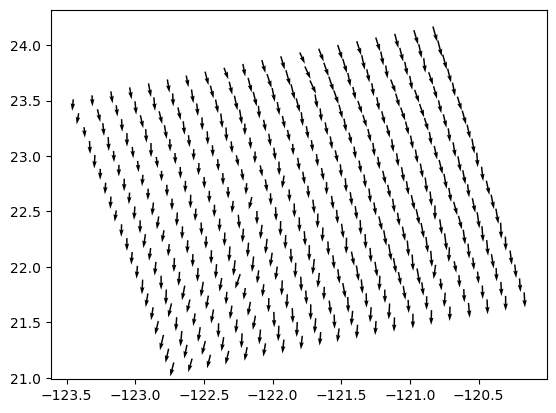

In [10]:
import matplotlib.pyplot as plt
import numpy as np

step = 5
X = ds.coords['gridlon_0'][0:100:step, 0:100:step]
Y = ds.coords['gridlat_0'][0:100:step, 0:100:step]
U = ds.MAXUW_P8_L103_GLC0_max1h[0:100:step, 0:100:step]
V = ds.MAXVW_P8_L103_GLC0_max1h[0:100:step, 0:100:step]

normalized_U = (U - U.min())/(U.max() - U.min())
normalized_V = (V - V.min())/(V.max() - V.min())
fig, ax = plt.subplots()

q = ax.quiver(X, Y, U, V)

plt.show()

In [11]:
U - U.mean()

<xarray.DataArray 'MAXUW_P8_L103_GLC0_max1h' (ygrid_0: 20, xgrid_0: 20)>
array([[-1.4775    , -1.6025    , -1.415     , -1.415     , -1.165     ,
        -1.04      , -0.78999996, -0.78999996, -0.66499996, -0.91499996,
        -0.66499996, -0.60249996, -0.4775    , -0.3525    , -0.415     ,
        -0.415     ,  0.08500001, -0.10249999, -0.29      , -0.03999999],
       [-1.3525    , -1.2275    , -1.4775    , -1.04      , -0.53999996,
        -0.72749996, -0.53999996, -0.53999996, -0.72749996, -0.16499999,
        -0.78999996, -0.66499996, -0.60249996, -0.10249999, -0.3525    ,
        -0.66499996, -0.10249999, -0.16499999, -0.10249999,  0.02250001],
       [-1.4775    , -0.78999996, -1.04      , -0.415     , -0.72749996,
        -1.165     , -0.16499999, -0.10249999, -0.3525    ,  0.21000001,
        -0.10249999, -0.22749999, -0.22749999,  0.3975    ,  0.21000001,
         0.02250001, -0.10249999,  0.02250001, -0.16499999,  0.14750001],
       [-1.3525    , -0.60249996, -0.91499996, -1.1025    , -0.97749996,
        -1.165     , -0.415     , -0.53999996, -0.03999999, -0.4775    ,
         0.58500004,  0.08500001, -0.53999996,  0.52250004,  0.64750004,
        -0.97749996,  0.3975    ,  0.08500001,  0.46      ,  0.2725    ],
       [-0.97749996, -1.415     , -1.3525    , -1.1025    , -0.60249996,
        -0.85249996, -0.78999996, -0.53999996, -0.10249999, -0.85249996,
         0.2725    ,  0.46      ,  0.46      ,  0.52250004,  0.02250001,
         0.08500001, -0.53999996,  0.08500001,  0.14750001, -0.16499999],
...
         0.08500001, -0.10249999, -0.10249999, -0.29      ,  0.3975    ,
         0.52250004,  0.21000001,  0.14750001,  0.83500004,  1.085     ,
         0.52250004,  0.96000004,  1.21      ,  0.83500004,  0.52250004],
       [-0.10249999, -0.10249999, -0.29      , -0.03999999,  0.46      ,
         0.14750001, -0.22749999,  0.21000001,  0.46      ,  0.02250001,
         0.3975    ,  0.89750004,  0.46      ,  1.21      ,  0.58500004,
         0.335     ,  1.335     ,  0.52250004,  1.1475    ,  0.83500004],
       [-0.03999999,  0.08500001, -0.10249999,  0.64750004,  0.71000004,
         0.58500004,  0.08500001,  0.52250004,  0.71000004,  0.83500004,
         0.58500004,  0.89750004,  1.71      ,  1.2725    ,  0.58500004,
         0.58500004,  0.2725    ,  0.58500004,  0.21000001,  1.0225    ],
       [-0.97749996,  0.64750004,  0.08500001,  0.08500001,  0.08500001,
        -0.10249999,  0.335     ,  0.77250004,  0.71000004,  0.89750004,
         1.21      ,  1.085     ,  1.585     ,  1.2725    ,  1.085     ,
         0.71000004,  0.58500004,  0.83500004,  0.64750004,  1.0225    ],
       [-0.66499996, -0.16499999,  0.2725    ,  0.335     ,  0.52250004,
         0.3975    ,  0.46      ,  0.83500004,  1.1475    ,  0.46      ,
         0.89750004,  1.0225    ,  1.3975    ,  1.335     ,  1.21      ,
         1.21      ,  1.1475    ,  0.89750004,  1.1475    ,  1.1475    ]],
      dtype=float32)
Coordinates:
    gridlat_0  (ygrid_0, xgrid_0) float32 ...
    gridlon_0  (ygrid_0, xgrid_0) float32 ...
Dimensions without coordinates: ygrid_0, xgrid_0

In [8]:
#Subsetting the region 


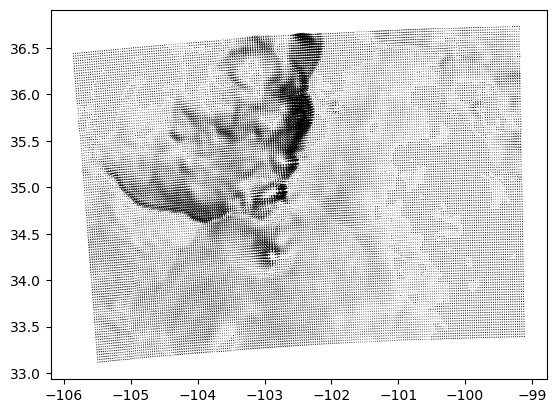

In [6]:
step = 12
l = 650
offset = 200
y = 340
o = 125
X = ds.coords['gridlon_0'][y: y + o,l: l+offset]
Y = ds.coords['gridlat_0'][y: y + o, l:l + offset]
U = ds.UGRD_P0_L103_GLC0[y: y + o, l:l + offset]
V = ds.VGRD_P0_L103_GLC0[y: y + o,l:l+offset]

normalized_U = (U - U.min())/(U.max() - U.min())
normalized_V = (V - V.min())/(V.max() - V.min())
fig, ax = plt.subplots()

q = ax.quiver(X, Y, U, V)

plt.show()

In [69]:
for i in ds.data_vars:
    print(i,ds[i].attrs['long_name'])
    print("")

TMP_P0_L1_GLC0 Temperature

TMP_P0_L3_GLC0 Temperature

TMP_P0_L7_GLC0 Temperature

TMP_P0_L100_GLC0 Temperature

TMP_P0_L102_GLC0 Temperature

TMP_P0_L103_GLC0 Temperature

TMP_P0_L105_GLC0 Temperature

TMP_P0_2L108_GLC0 Temperature

POT_P0_L1_GLC0 Potential temperature

POT_P0_L103_GLC0 Potential temperature

POT_P0_2L108_GLC0 Potential temperature

DPT_P0_L103_GLC0 Dew point temperature

DPT_P0_2L108_GLC0 Dew point temperature

LHTFL_P0_L1_GLC0 Latent heat net flux

SHTFL_P0_L1_GLC0 Sensible heat net flux

SPFH_P0_L1_GLC0 Specific humidity

SPFH_P0_L100_GLC0 Specific humidity

SPFH_P0_L103_GLC0 Specific humidity

SPFH_P0_L105_GLC0 Specific humidity

SPFH_P0_2L108_GLC0 Specific humidity

RH_P0_L4_GLC0 Relative humidity

RH_P0_L100_GLC0 Relative humidity

RH_P0_L103_GLC0 Relative humidity

RH_P0_2L108_GLC0 Relative humidity

PWAT_P0_2L108_GLC0 Precipitable water

PWAT_P0_L200_GLC0 Precipitable water

PRATE_P0_L1_GLC0 Precipitation rate

SNOD_P0_L1_GLC0 Snow depth

WEASD_P0_L1_GLC0 Wat

In [76]:
ds['UGRD_P0_L103_GLC0'].attrs

{'center': 'US National Weather Service - NCEP (WMC)',
 'production_status': 'Operational products',
 'long_name': 'U-component of wind',
 'units': 'm s-1',
 'grid_type': 'Lambert Conformal can be secant or tangent, conical or bipolar',
 'parameter_discipline_and_category': 'Meteorological products, Momentum',
 'parameter_template_discipline_category_number': array([0, 0, 2, 2], dtype=int32),
 'level_type': 'Specified height level above ground (m)',
 'level': array([10.], dtype=float32),
 'forecast_time': array([6], dtype=int32),
 'forecast_time_units': 'hours',
 'initial_time': '05/23/2023 (19:00)'}

In [ ]:
UGRD_P0_L6_GLC0 U-component of wind

UGRD_P0_L7_GLC0 U-component of wind

UGRD_P0_L100_GLC0 U-component of wind

UGRD_P0_L102_GLC0 U-component of wind

UGRD_P0_L103_GLC0 U-component of wind

UGRD_P0_L105_GLC0 U-component of wind

UGRD_P0_2L108_GLC0

In [10]:
import cartopy

In [2]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature


def main():
    fig = plt.figure(figsize=[10, 5])
    print('aqui')
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
    ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                          sharex=ax1, sharey=ax1)
    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)

    # Limit the map to -60 degrees latitude and below.
    ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)

    ax1.gridlines()
    ax2.gridlines()

    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.OCEAN)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax2.set_boundary(circle, transform=ax2.transAxes)


In [ ]:
main()